In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier


In [2]:
data = pd.read_csv("../heavy/shuffled-full-set-hashed.csv", names=["Document","Words"],sep=",")

Y=data["Document"]
X=data["Words"]


In [3]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y, test_size=0.3, random_state=42)
classes =Y.unique()

In [4]:
#trigram 
vectorizertrigram= HashingVectorizer(decode_error='ignore',ngram_range=(3, 3))
wordtrigram= vectorizertrigram.fit_transform(Xtrain.values.astype('U'))
wordtrigram.shape

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/sparse/compressed.py:130: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.indices) != 1 or np.rank(self.indptr) != 1:


(43542, 1048576)

In [5]:

wordTest_trigram =vectorizertrigram.transform(Xtest.values.astype('U'))
wordTest_trigram.shape



(18662, 1048576)

In [6]:
sgclf=SGDClassifier(loss='hinge', penalty='l2',alpha=0.01, n_iter=5, random_state=42)

In [7]:

SG = sgclf.fit(wordtrigram,Ytrain)

/Library/Python/2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [8]:
predictedSG = SG.predict(wordTest_trigram)
np.mean(predictedSG == Ytest)

0.7231807951987997

In [9]:
predictedSG

array(['BILL', 'BILL', 'BILL', ..., 'BILL', 'CANCELLATION NOTICE', 'BILL'],
      dtype='|S23')

In [10]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    %matplotlib inline

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predictedSG,Ytest,labels=classes)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:


array([[1173,   22,   44,   78,  155,   22,    4,    7,   38,   38,    9,
           0,    1,    2],
       [   0,   71,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [  70,  117, 5318,  709,  680,  132,   26,   40,  536,  260,  112,
          35,   38,   64],
       [   9,    6,  174, 1972,   66,   50,   27,    8,  213,   47,    5,
           3,   13,   11],
       [ 136,    0,  120,   50, 1910,   14,    7,   52,   11,  142,   12,
          15,    0,    0],
       [   0,    1,    1,    0,    1,    5,    0,    2,    4,    0,    0,
           0,    0,    0],
       [   0,    0,    2,  115,    2,    4,  214,    0,    1,    0,    0,
           0,    0,    0],
       [   0,    0,    1,    1,    8,    0,    0,   72,    0,    0,    1,
           0,    0,    0],
       [   7,    8,  101,  205,   26,   75,    3,    0, 1906,    8,    0,
           1,   13,   10],
       [   5,    0,    6,   19,   47,    3,    1,   14,    3,  765,    3,
           2,    

In [12]:
cm=confusion_matrix(predictedSG, Ytest)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


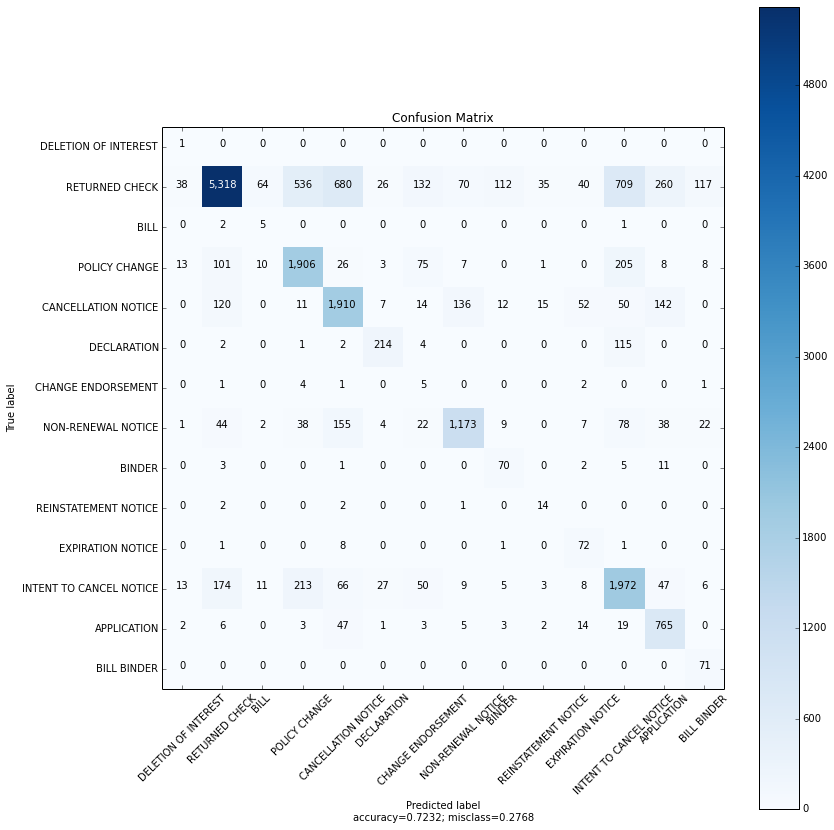

In [13]:
plot_confusion_matrix(cm           = cm ,
                      normalize    = False,
                      target_names = classes,
                      title        = "Confusion Matrix")

In [14]:
error = np.mean(predictedSG != Ytest)
const = 1.96
n = len(Ytest)
ci = error + const * np.sqrt( (error * (1 - error)) / n)
ci1 = error - const * np.sqrt( (error * (1 - error)) / n)
print("the 95% likelihood confidence interval is ",[ ci1, ci])

('the 95% likelihood confidence interval is ', [0.27039974432320923, 0.2832386652791914])
